In [1]:
import keras
keras.__version__

'2.9.0'

# Introduction to convnets （visual）
Note by Stella:
Dense layer to learn global mode, convnet to learn local mode, here the local is 3 * 3 window, filter is 32, response map: 28 * 28 -> 26 * 26 -> 13 * 13 -> 11 * 11 -> 5 * 5 -> 3 * 3, edge & padding & stride affect the height of the input and output width.
Convolution principle: slide window, each possible location to extract the surrounding features 3D block, with the weight matrix (convolution kernel) do tensor product, become (output_depth,) the 1D vector. These vectors are reorganized into a new 3D feature map.

Character.
1, translation invariant: the lower right corner can be recognized, the upper left corner can also. dense to re-learn.
2, spatial hierarchies of patterns: spatial hierarchies of patterns, e.g., the first layer learns edges, the second layer learns larger patterns composed of the first layer.

Translated with www.DeepL.com/Translator (free version)
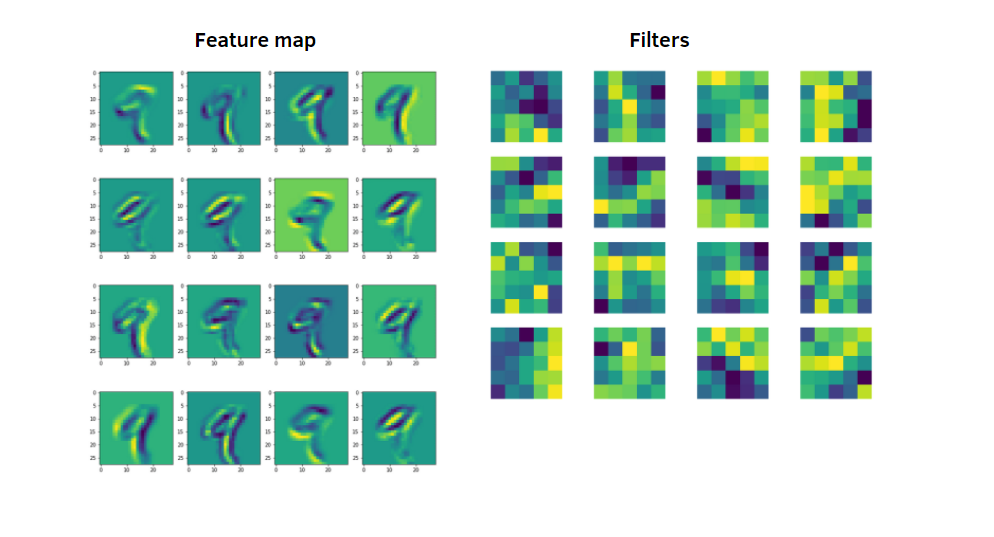. 
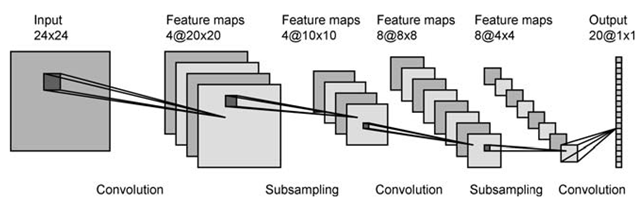

In [2]:
from keras import layers
from keras import models

# basic convnet 
# width and height dimensions tend to shrink as we go deeper into the network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # ! h=28, w=28, channel=1(not including batch dimension) 
model.add(layers.MaxPooling2D((2, 2))) # maxpool: hardcode max operation rather than linear(conv cole), output is half of input
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # 64 or 32 is number of channels(filter), not RGB channels
model.add(layers.MaxPooling2D((2, 2))) # 2*2 stride=2 usually, purpose: 1, holistic 2, less feature so get the hierarchy 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # 3*3 stride=1 usually

In [3]:
# architecture 
model.summary() # output: (height, width, channels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [7]:
# feed last output tensor of previous step (shape (3, 3, 64)) into a densely-connected classifier network
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10-way classification 10 numbers

In [8]:
# (3, 3, 64) outputs were flattened into vectors of shape (576,), before going through two Dense layers.
model.summary() 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
# train our convnet on the MNIST digits
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 61s 64ms/step - loss: 0.7602 - accuracy: 0.7441
Epoch 2/5
938/938 [==============================] - 69s 74ms/step - loss: 0.1004 - accuracy: 0.9789
Epoch 3/5
938/938 [==============================] - 63s 68ms/step - loss: 0.0537 - accuracy: 0.9869
Epoch 4/5
938/938 [==============================] - 56s 60ms/step - loss: 0.0392 - accuracy: 0.9898
Epoch 5/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0300 - accuracy: 0.9926


# evaluate the model on the test data

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test acc: ' , test_acc) # Accuracy has been increased from ~97% to ~99%

313/313 [==============================] - 4s 11ms/step - loss: 0.0422 - accuracy: 0.9901
test acc:  0.9901000261306763
